Mean: 17.64
25% Quartile: 4.35
Median: 13.89
75% Quartile: 26.32
Standard Deviation: 17.05


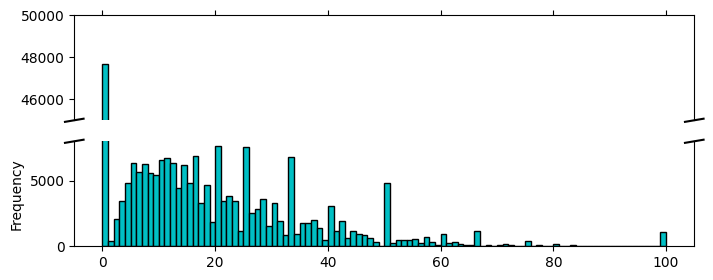

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/home/pgajo/working/data/datasets/English/Incels.is/IFC-22-EN_updated_hs_scores_223k.csv")
# df = pd.read_csv("/home/pgajo/working/data/datasets/Italian/Il_forum_dei_brutti/IFC-22-IT_updated.csv_hs_scores_30k.csv")
# df = pd.read_csv("/home/pgajo/working/data/datasets/English/Incels.is/IFC-22-EN_updated_hs_scores_223k_exclOP.csv")
# df = pd.read_csv("/home/pgajo/working/data/datasets/Italian/Il_forum_dei_brutti/IFC-22-IT_updated.csv_hs_scores_30k_exclOP.csv")
df['hs_score'] = df['hs_score'] * 100
# Set the DPI and figsize

%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8, 3)
mean = round(df['hs_score'].mean(), 2)
q25 = round(df['hs_score'].quantile(0.25), 2)
median = round(df['hs_score'].median(), 2)
q75 = round(df['hs_score'].quantile(0.75), 2)
std_dev = round(df['hs_score'].std(), 2)

print("Mean:", mean)
print("25% Quartile:", q25)
print("Median:", median)
print("75% Quartile:", q75)
print("Standard Deviation:", std_dev)

# Create subplots with 2 rows
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the histogram on both axes
ax1.hist(df['hs_score'], bins=100, edgecolor='black', color='#00bfc4')
ax2.hist(df['hs_score'], bins=100, edgecolor='black', color='#00bfc4')

# Set y-axis limits for the 'zoom in' effect
ax1.set_ylim(45000, 50000)  # Upper plot
ax2.set_ylim(0, 8000)  # Lower plot

# Hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # Don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This function is used to create a break mark on the y-axis
def break_y_axis_top(ax, d=.015):
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d,+d),(-d,+d), **kwargs)
    ax.plot((1-d,1+d),(-d,+d), **kwargs)

def break_y_axis_bottom(ax, d=.015):
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


break_y_axis_top(ax1)
break_y_axis_bottom(ax2)

# plt.xlabel('HS Score')
plt.ylabel('Frequency')
# fig.text(0.03, 0.5, 'Frequency', va='center', rotation='vertical')  # Adjust the positioning of the label here
chart_filename = '/home/pgajo/working/images_tables/3_hate_forecasting/monolingual_setting/en_hs_score_hist_x100_incl0_thin_brokenY_100bins_noxlabel.pdf'
# chart_filename = '/home/pgajo/working/images_tables/3_hate_forecasting/monolingual_setting/en_hs_score_hist_x100_incl0_thin_brokenY_excl0.pdf'
plt.savefig(chart_filename, bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()
